<a href="https://colab.research.google.com/github/yeshwanth098/sml/blob/main/sml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
d=pd.read_csv('/content/cars.csv')
print(d)

     buying  maint  doors persons lug_boot safety  class
0     vhigh  vhigh      2       2    small    low  unacc
1     vhigh  vhigh      2       2    small    med  unacc
2     vhigh  vhigh      2       2    small   high  unacc
3     vhigh  vhigh      2       2      med    low  unacc
4     vhigh  vhigh      2       2      med    med  unacc
...     ...    ...    ...     ...      ...    ...    ...
1723    low    low  5more    more      med    med   good
1724    low    low  5more    more      med   high  vgood
1725    low    low  5more    more      big    low  unacc
1726    low    low  5more    more      big    med   good
1727    low    low  5more    more      big   high  vgood

[1728 rows x 7 columns]


In [ ]:
d['buying']=d['buying'].replace({'vhigh':1,'high':2,'med':3,'low':4})
d['maint']=d['maint'].replace({'vhigh':4,'high':3,'med':2,'low':1})
d['lug_boot']=d['lug_boot'].replace({'small':1,'med':2,'big':3})
d['safety']=d['safety'].replace({'low':1,'med':2,'high':3})
print(d)

      buying  maint  doors persons  lug_boot  safety  class
0          1      4      2       2         1       1  unacc
1          1      4      2       2         1       2  unacc
2          1      4      2       2         1       3  unacc
3          1      4      2       2         2       1  unacc
4          1      4      2       2         2       2  unacc
...      ...    ...    ...     ...       ...     ...    ...
1723       4      1  5more    more         2       2   good
1724       4      1  5more    more         2       3  vgood
1725       4      1  5more    more         3       1  unacc
1726       4      1  5more    more         3       2   good
1727       4      1  5more    more         3       3  vgood

[1728 rows x 7 columns]


<ipython-input-23-f03c6439b589>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['buying']=d['buying'].replace({'vhigh':1,'high':2,'med':3,'low':4})
<ipython-input-23-f03c6439b589>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  d['maint']=d['maint'].replace({'vhigh':4,'high':3,'med':2,'low':1})
<ipython-input-23-f03c6439b589>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the 

In [ ]:
y=d['class']
print(y)

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object


In [ ]:
x=d.drop('class',axis=1)
print(x)

      buying  maint  doors persons  lug_boot  safety
0          1      4      2       2         1       1
1          1      4      2       2         1       2
2          1      4      2       2         1       3
3          1      4      2       2         2       1
4          1      4      2       2         2       2
...      ...    ...    ...     ...       ...     ...
1723       4      1  5more    more         2       2
1724       4      1  5more    more         2       3
1725       4      1  5more    more         3       1
1726       4      1  5more    more         3       2
1727       4      1  5more    more         3       3

[1728 rows x 6 columns]


In [ ]:
x.isnull().sum()
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x.fillna(0, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
!pip install scikit-learn pandas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in x_train.select_dtypes(include=['object']).columns:
    x_train[column] = encoder.fit_transform(x_train[column])
    x_test[column] = encoder.transform(x_test[column])
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model=Perceptron()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.6763005780346821


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[  3,  45,  35,   1],
       [  0,  11,   0,   0],
       [  2,  16, 219,   0],
       [  0,  13,   0,   1]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.60      0.04      0.07        84
        good       0.13      1.00      0.23        11
       unacc       0.86      0.92      0.89       237
       vgood       0.50      0.07      0.12        14

    accuracy                           0.68       346
   macro avg       0.52      0.51      0.33       346
weighted avg       0.76      0.68      0.64       346



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.9421965317919075


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 75,   2,   7,   0],
       [  0,  10,   0,   1],
       [  6,   1, 230,   0],
       [  3,   0,   0,  11]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         acc       0.89      0.89      0.89        84
        good       0.77      0.91      0.83        11
       unacc       0.97      0.97      0.97       237
       vgood       0.92      0.79      0.85        14

    accuracy                           0.94       346
   macro avg       0.89      0.89      0.89       346
weighted avg       0.94      0.94      0.94       346



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.8554913294797688


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 52,   1,  31,   0],
       [  3,   6,   1,   1],
       [  6,   3, 228,   0],
       [  4,   0,   0,  10]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.80      0.62      0.70        84
        good       0.60      0.55      0.57        11
       unacc       0.88      0.96      0.92       237
       vgood       0.91      0.71      0.80        14

    accuracy                           0.86       346
   macro avg       0.80      0.71      0.75       346
weighted avg       0.85      0.86      0.85       346



In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.930635838150289


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 69,   3,  12,   0],
       [  4,   7,   0,   0],
       [  0,   0, 237,   0],
       [  2,   3,   0,   9]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.92      0.82      0.87        84
        good       0.54      0.64      0.58        11
       unacc       0.95      1.00      0.98       237
       vgood       1.00      0.64      0.78        14

    accuracy                           0.93       346
   macro avg       0.85      0.78      0.80       346
weighted avg       0.93      0.93      0.93       346



In [ ]:
from sklearn.utils import resample

In [ ]:
x.shape

(1728, 6)

In [ ]:
y.shape

(1728,)

Accuracy for iteration 1: 0.9509
Accuracy for iteration 2: 0.9509
Accuracy for iteration 3: 0.9509
Accuracy for iteration 4: 0.9393
Accuracy for iteration 5: 0.9422
Accuracy for iteration 6: 0.9306
Accuracy for iteration 7: 0.9480
Accuracy for iteration 8: 0.9335
Accuracy for iteration 9: 0.9393
Accuracy for iteration 10: 0.9364


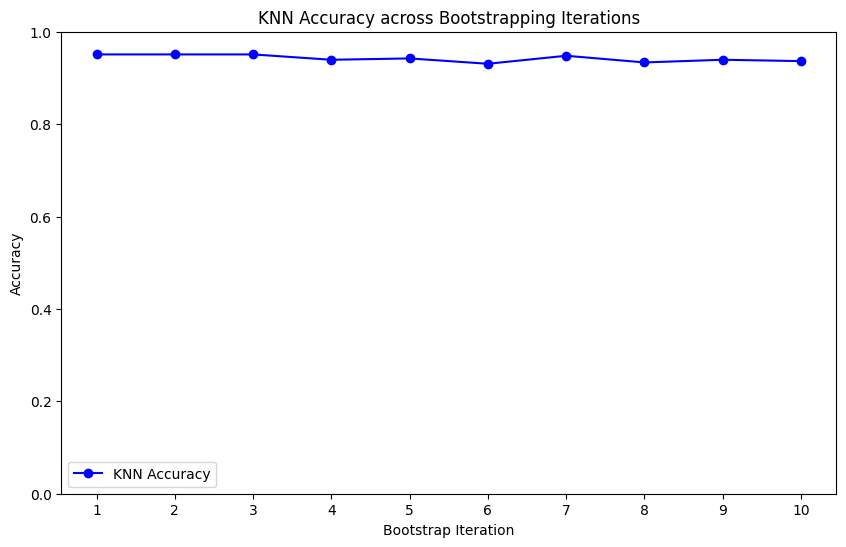

In [ ]:
import numpy as np
import pandas as pd # Import pandas for data manipulation
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
knn_accuracies = []

# Assuming 'x' is a pandas DataFrame
for column in x.select_dtypes(include=['object']).columns:
  # Replace both '5more' and 'more' with '5'
  x[column] = x[column].replace({'5more': '5', 'more': '5'})
  x[column] = pd.to_numeric(x[column])

for i in range(10):
    x_resampled, y_resampled = resample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
    model = KNeighborsClassifier()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)
    print(f"Accuracy for iteration {i+1}: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), knn_accuracies, marker='o', linestyle='-', color='b', label='KNN Accuracy')
plt.xlabel('Bootstrap Iteration')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy across Bootstrapping Iterations')
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.legend()
plt.show()

Accuracy for iteration 1: 0.8208
Accuracy for iteration 2: 0.8699
Accuracy for iteration 3: 0.8526
Accuracy for iteration 4: 0.8237
Accuracy for iteration 5: 0.8526
Accuracy for iteration 6: 0.8613
Accuracy for iteration 7: 0.8439
Accuracy for iteration 8: 0.8642
Accuracy for iteration 9: 0.8353
Accuracy for iteration 10: 0.8584


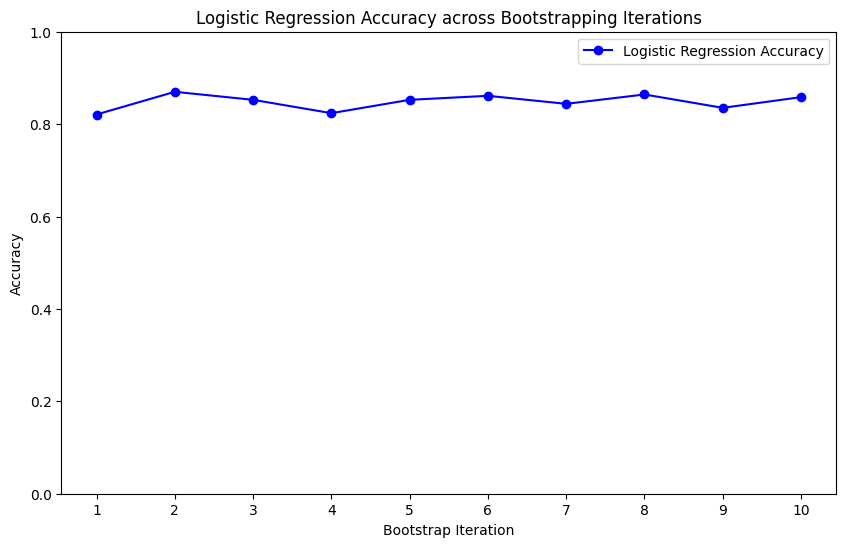

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

knn_accuracies = []

for i in range(10):
    x_resampled, y_resampled = resample(x, y)

    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)

    knn_accuracies.append(accuracy)
    print(f"Accuracy for iteration {i+1}: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), knn_accuracies, marker='o', linestyle='-', color='b', label='Logistic Regression Accuracy')
plt.xlabel('Bootstrap Iteration')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy across Bootstrapping Iterations')
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.legend()
plt.show()


Accuracy for iteration 1: 0.8786
Accuracy for iteration 2: 0.8468
Accuracy for iteration 3: 0.8555
Accuracy for iteration 4: 0.8757
Accuracy for iteration 5: 0.8757
Accuracy for iteration 6: 0.8526
Accuracy for iteration 7: 0.8786
Accuracy for iteration 8: 0.8179
Accuracy for iteration 9: 0.8555
Accuracy for iteration 10: 0.8815


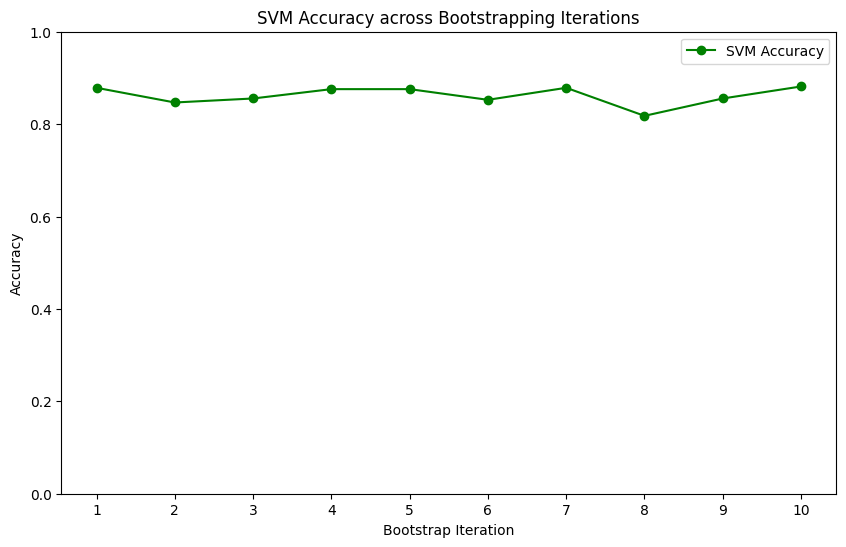

In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
svm_accuracies = []
for i in range(10):
    x_resampled, y_resampled = resample(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
    model = SVC(kernel='linear')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    svm_accuracies.append(accuracy)
    print(f"Accuracy for iteration {i+1}: {accuracy:.4f}")
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), svm_accuracies, marker='o', linestyle='-', color='g', label='SVM Accuracy')
plt.xlabel('Bootstrap Iteration')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy across Bootstrapping Iterations')
plt.xticks(range(1, 11))
plt.ylim(0, 1)
plt.legend()
plt.show()
